In [31]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import time

1. На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр
сигнала с помощью стандартной функции быстрого преобразования Фурье.

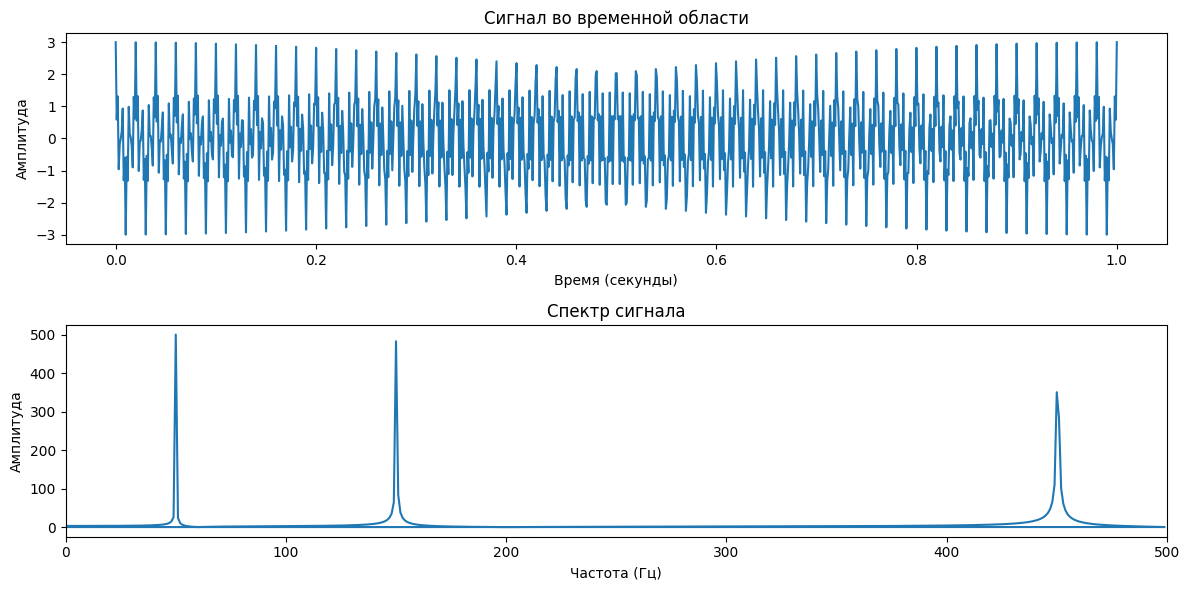

In [30]:
def cosinus(x, frequency = 50, amplitude=1):
    w = 2 * np.pi * frequency
    return amplitude * np.cos(w * x)

freq = 1000
duration = 1.0
t = np.linspace(0, duration, int(freq * duration))
y = cosinus(t) + cosinus(t,frequency = 150) + cosinus(t, frequency = 450)

fft_result = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(y), 1 / freq)
ampl = np.abs(fft_result)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title('Сигнал во временной области')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(fft_freqs, ampl)
plt.title('Спектр сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, freq / 2)

plt.tight_layout()
plt.show()

2. Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. При моделировании ФНЧ воспользоваться формулой H(w, w_c) = ((w_c)^2)/((-w)^2 + j * (sqrt(2)) * w_c * w + 1) (32) из методички “Козулин Цифровая обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с амплитудой отфильтрованного сигнала.

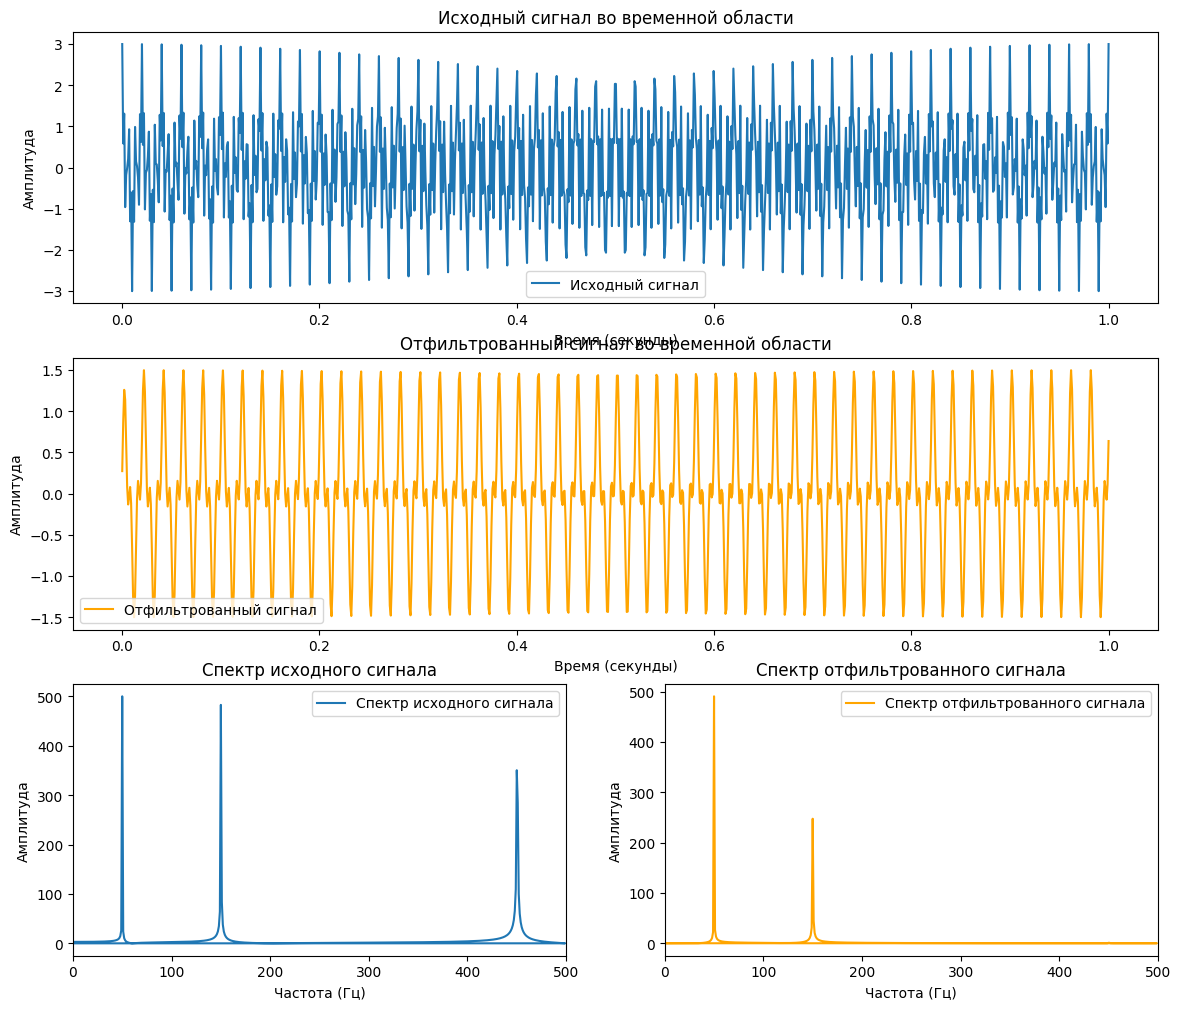

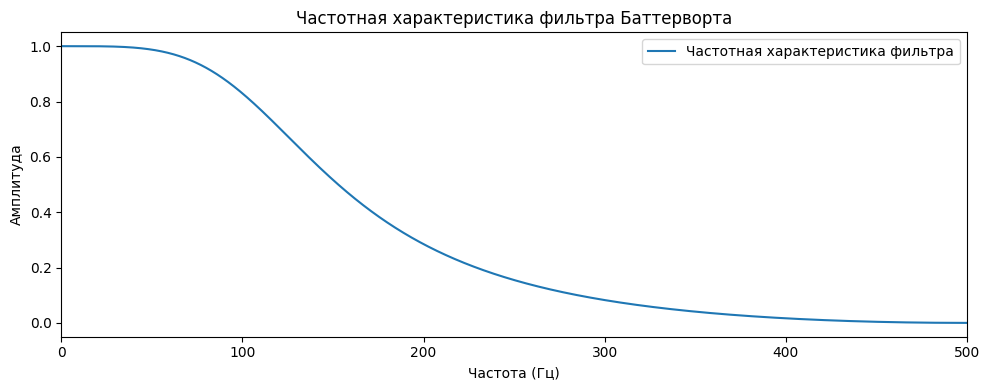

In [36]:
cutoff_frequency = 120
order = 2

#частота среза
nyquist_frequency = 0.5 * freq
normalized_cutoff = cutoff_frequency / nyquist_frequency

b, a = butter(order, normalized_cutoff, btype='low', analog=False)

filtered_signal = lfilter(b, a, y)
fft_signal = np.fft.fft(y)
fft_filtered_signal = np.fft.fft(filtered_signal)
fft_freqs = np.fft.fftfreq(len(y), 1 / freq)

# Амплитудный спектр
amplitude = np.abs(fft_signal)
amplitude_filtered = np.abs(fft_filtered_signal)

# Вычисление частотной характеристики фильтра
w, h = freqz(b, a, worN=8000)
w = 0.5 * freq * w / np.pi

plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
plt.plot(t, y, label='Исходный сигнал')
plt.title('Исходный сигнал во временной области')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', color='orange')
plt.title('Отфильтрованный сигнал во временной области')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(fft_freqs, amplitude, label='Спектр исходного сигнала')
plt.title('Спектр исходного сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, sampling_rate / 2)
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(fft_freqs, amplitude_filtered, label='Спектр отфильтрованного сигнала', color='orange')
plt.title('Спектр отфильтрованного сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, freq / 2)
plt.legend()

plt.figure(figsize=(10, 4))
plt.plot(w, np.abs(h), label='Частотная характеристика фильтра')
plt.title('Частотная характеристика фильтра Баттерворта')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, freq / 2)
plt.legend()

plt.tight_layout()
plt.show()

3. Оставьте в сигнале только 50 Гц и 450 Гц.

На этот же график нанесите Ваш отфильтрованный сигнал.

4. Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой H(w, w_c) = ((w)^2)/((-w_с)^2 + j * (sqrt(2)) * w_c * w + 1) (35) из методички “Козулин Цифровая обработка сигналов Python.pdf”.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра ФНЧ.

5. Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту 150Гц. При моделировании использовать формулы H_pf(w, w_c) = H_flf(w, w_c) * H_fhf(w, w_c) (36) и H(s) = H_n((s^2 + w0^2) / B*s) B = w_b2 - w_b1 w0 = sqrt(w_b2 * w_b1) (37).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров ПФ/ЗФ.

6. Согласно формулам (28, 29 с. 68-69) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 4-го и 5-го порядка с автоматическим определением
полюсов фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 5-го порядка.

Полюсы передаточной функции обладают симметрией, а именно их число и конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

7. Сравните реализованный Вами фильтр 5-го порядка с фильтром 2-го порядка, объясните разницу.

8. Сравните Ваш алгоритм ФНЧ Баттерворта 5-го порядка с встроенным фильтром
Баттерворта библиотеки scipy.signal также для 5-го порядка используя.

9. Добавить шум к исходному сигналу, посмотрите как происходит фильтрация для зашумленного сигнала.

10. Реализуйте фильтр ФНЧ Чебышева 1го рода N порядка.